In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = [[5,120],[6,130],[5,110 ],[4,105],[6,140],
           [5,150],[7,115],[4,120],[6,145],[5,125]
           ]
y = [0,0,0,0,1,1,1,0,1,0] # 0: Apple, 1: Orange

# train an SVM model with all default hyperparameter setting
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y)

#Train an SVM model on the training set using the default hyperparameters using the kernel rbf.
model = svm.SVC(kernel='linear')
#Evaluate the trained model's performance on the testing set.
clf.fit(X_train, y_train)
#Report the accuracy score, which is the percentage of correct predictions made by the model on the testing data.
print(clf.score(X_test, y_test))

0.3333333333333333


In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', SVC(probability=True))
])

In [12]:
param_grid = {
    'feature_selection__k': [2, 3, 4],  
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 1]
}

In [13]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

In [14]:
grid_search.fit(X_train, y_train)


C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [2, 3, 4],
                         'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [15]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'feature_selection__k': 2, 'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [16]:
y_pred = grid_search.predict(X_test)

In [17]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=df.iloc[:, -1].unique()))


Accuracy: 0.3333333333333333

Classification Report:


NameError: name 'df' is not defined

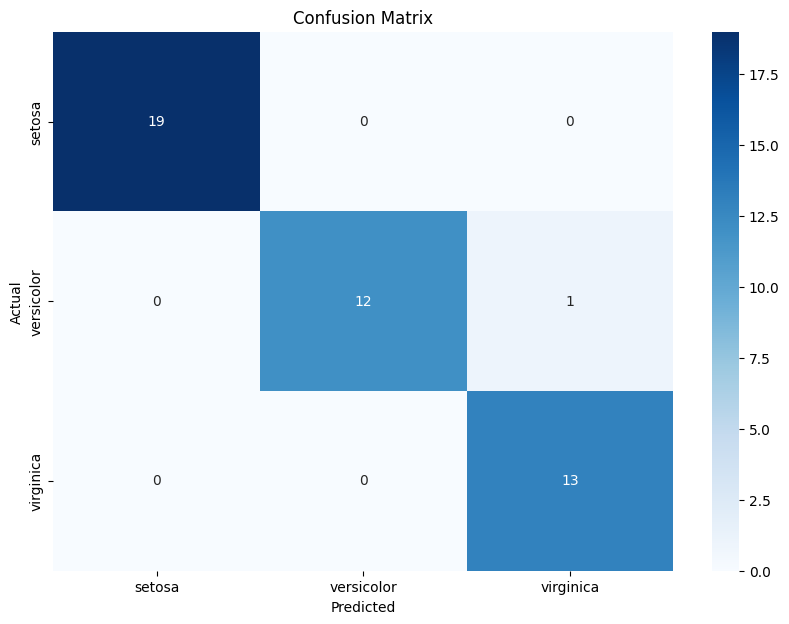

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.iloc[:, -1].unique(), yticklabels=df.iloc[:, -1].unique())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

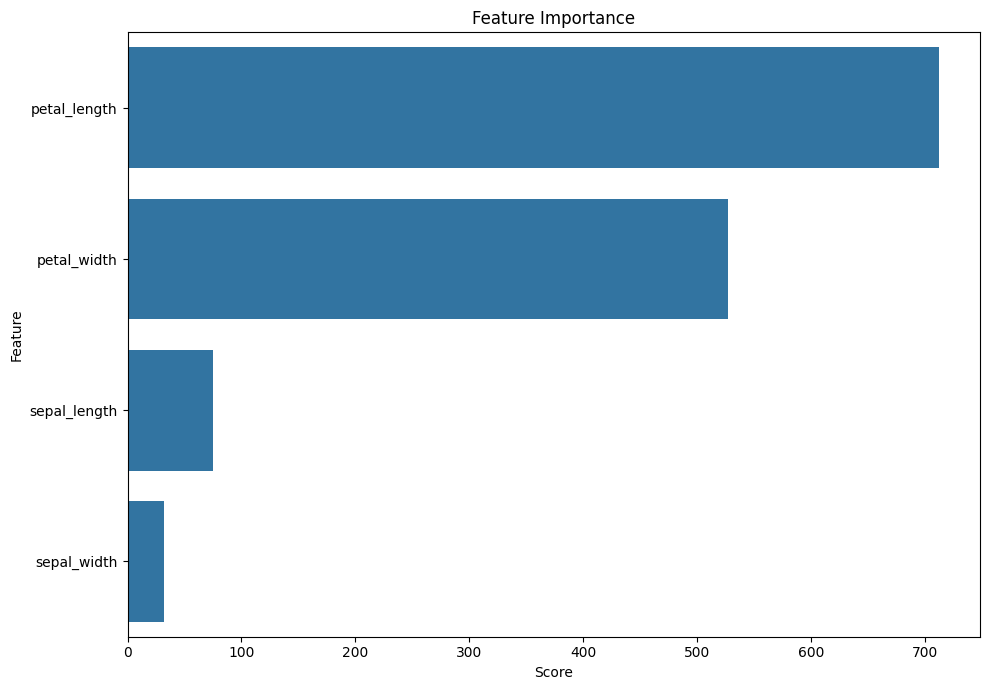

In [ ]:
best_features = grid_search.best_estimator_.named_steps['feature_selection']
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': best_features.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

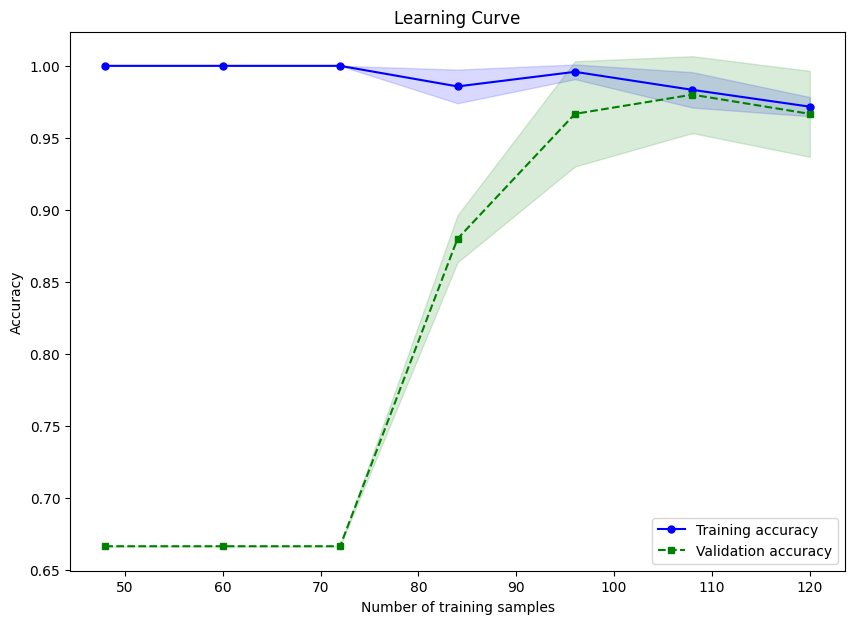

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
X_visual = X.iloc[:, [2, 3]]  # petal length and width
y_visual = y


In [ ]:
# Get only SVM parameters and remove 'svm__' prefix
svm_params = {key.replace('svm__', ''): value 
              for key, value in grid_search.best_params_.items() 
              if key.startswith('svm__')}

In [ ]:
clf = SVC(**svm_params)
clf.fit(X_visual, y_visual)

SVC(C=1, kernel='linear')

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


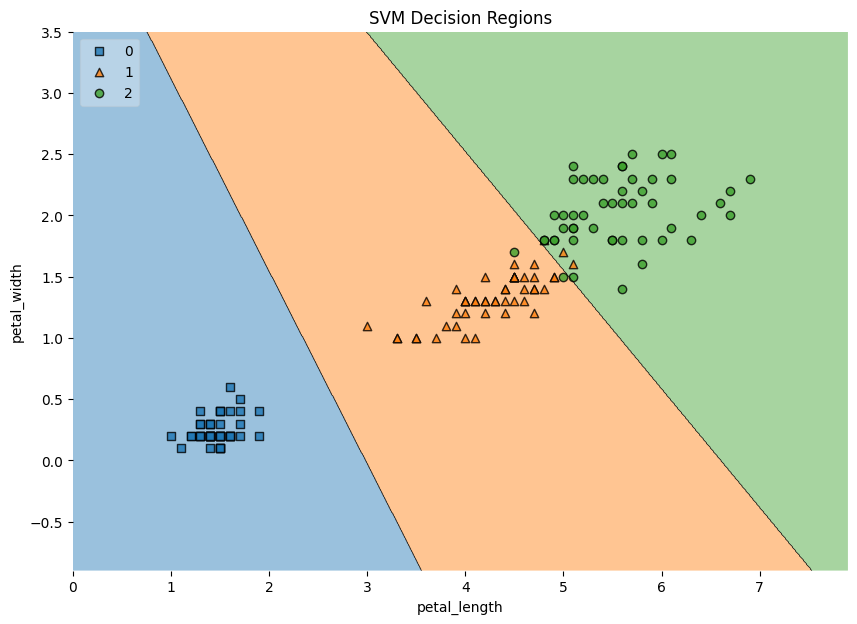

In [ ]:
plt.figure(figsize=(10, 7))
plot_decision_regions(X_visual.values, y_visual, clf=clf, legend=2)
plt.xlabel(X.columns[2])
plt.ylabel(X.columns[3])
plt.title('SVM Decision Regions')
plt.show()